# 1. Import cleaned data and necessary libraries
- Cleaned data generated by running `02_Exploratory_Data_Analysis_EDA` will be impoted into this notebook
- Required libraries are imported
- Inspect transferred data to see it is transferred corrctly

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_parquet('data/interim/data_outliers_cleared.parquet')
#print information of the cleaned data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2235 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2235 non-null   int64         
 1   Year_Birth               2235 non-null   int64         
 2   Income                   2235 non-null   float64       
 3   Kidhome                  2235 non-null   int64         
 4   Teenhome                 2235 non-null   int64         
 5   Dt_Customer              2235 non-null   datetime64[ns]
 6   Recency                  2235 non-null   int64         
 7   MntWines                 2235 non-null   int64         
 8   MntFruits                2235 non-null   int64         
 9   MntMeatProducts          2235 non-null   int64         
 10  MntFishProducts          2235 non-null   int64         
 11  MntSweetProducts         2235 non-null   int64         
 12  MntGoldProds             2235 non-null 

**According to the result from above cell, the data has transferred correctly.**

# 2. Top-performing products and low-revenue products.
- Identify the top-performing products and those with the lowest revenue.

Text(0.5, 1.0, 'Revenue from different products')

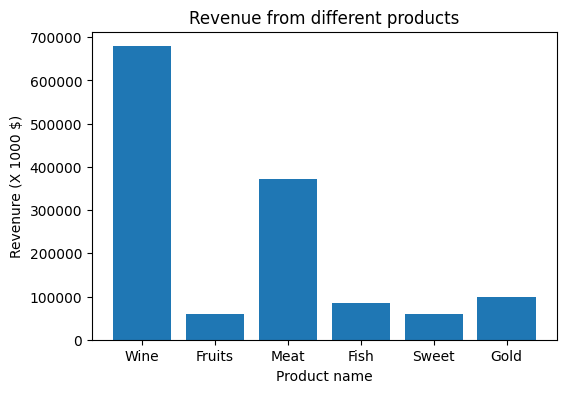

In [2]:
total_revenue_wine=df['MntWines'].sum()
total_revenue_fruits=df['MntFruits'].sum()
total_revenue_MeatProducts=df['MntMeatProducts'].sum()
total_revenue_FishProducts=df['MntFishProducts'].sum()
total_revenue_SweetProducts=df['MntSweetProducts'].sum()
total_revenue_GoldProducts=df['MntGoldProds'].sum()
plt.figure(figsize=(6, 4))
plt.bar(['Wine','Fruits','Meat','Fish','Sweet','Gold'], [total_revenue_wine,total_revenue_fruits,total_revenue_MeatProducts,total_revenue_FishProducts,
                                                        total_revenue_SweetProducts,total_revenue_GoldProducts
                                                        ])
plt.xlabel('Product name')
plt.ylabel('Revenure (X 1000 $)')
plt.title('Revenue from different products')

- Based on above result, top peforming product is wine.
- According to the above figure, lowest revenue comes from fruits. 

# 3. Relationship between age and last campaign acceptance.
- Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

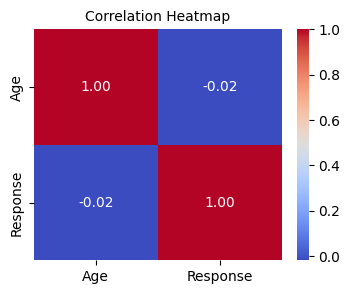

In [3]:
#using heatmap to show correlation between age and acceptance rate of the last campaign
# Create a DataFrame
data = pd.DataFrame({"Age": df['Age'], "Response": df['Response']})
# Compute Correlation Matrix
correlation_matrix = data.corr()
# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=10)
plt.show()

- Correlation analysis between Age and Response shows very week relationship between them

# 4. Spending patterns by number of children
- Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

                 total_spending
Number_children                
0                        701269
1                        533094
2                        103544
3                         14554


Text(0, 0.5, 'Familiy total expendure')

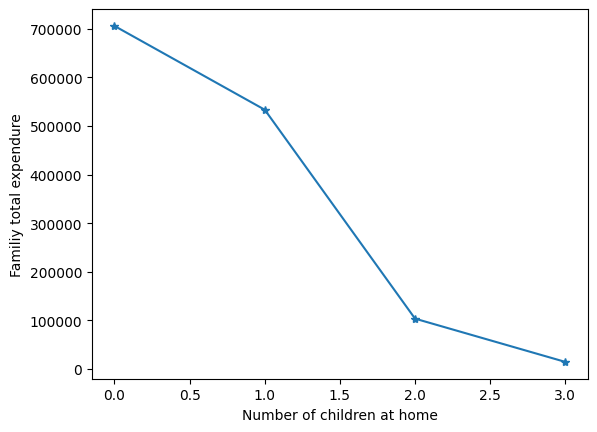

In [4]:
number_children_expenditure=df[['Number_children','total_spending']].groupby('Number_children').sum()
print(number_children_expenditure)
plt.plot([0,1,2,3],[705647,533243,103544,14554],marker='*')
plt.xlabel('Number of children at home')
plt.ylabel('Familiy total expendure')

- Based on the graph, by increasing number of children, expendure has decreased

# 5. Education levels among customers with complaints.
- Analyze the educational background of customers who lodged complaints in the last two years.

           Complain
Education          
0.0               3
1.0               0
2.0              14
3.0               2
4.0               1


Text(0, 0.5, 'Familiy total expendure')

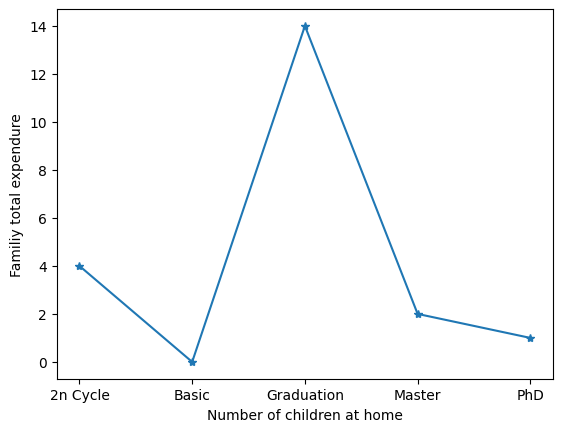

In [5]:
number_complain =df[['Education','Complain']].groupby('Education').sum()
print(number_complain)
plt.plot(['2n Cycle','Basic','Graduation','Master','PhD'],[4,0,14,2,1],marker='*')
plt.xlabel('Number of children at home')
plt.ylabel('Familiy total expendure')


- Based on the graph, people with Graduation level have highest number of complains